In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pip install graphviz
from graphviz import Digraph

Note: you may need to restart the kernel to use updated packages.


In [2]:
def f(x):
    return x**2-4*x+5

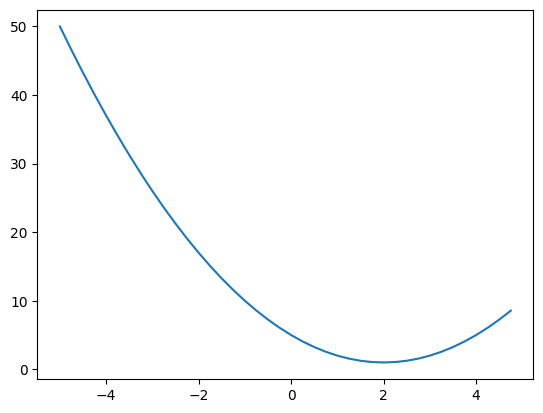

In [3]:
x=np.arange(-5,5,0.25)
y=f(x)
plt.plot(x,y)

In [4]:
h=0.1
y=f(3)
y2=f(3+h)
(y2-y)/h

2.1000000000000085

In [5]:
a=2
b=-3
c=10
h=0.001
def func(a,b,c):
 return a*b+c
d= func(a,b,c)
d
d1=func(a,b,c+h)
print(d)
print(d1)
(d1-d)/h

4
4.0009999999999994


0.9999999999994458

In [11]:
class Value:
    def __init__(self,data,children=(),op=''):
        self.data=data
        self._prev=set(children)
        self.op=op

    def __repr__(self):
        return f"Value(data:{self.data})"
    def __add__(self,other):
        return Value(self.data+other.data,(self,other),'+')
    def __sub__(self,other):
        return Value(self.data-other.data,(self,other),'-')
    def __mul__(self,other):
        return Value(self.data*other.data,(self,other),'*')
    
a=Value(3)
b=Value(-3)
c=Value(4)
d=a*b+c
d

Value(data:-5)

In [12]:
#Visualization



def trace(root):
    nodes,edges=set(),set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for c in v._prev:
                edges.add((c,v))
                build(c)
    build(root)
    return nodes,edges

def draw(root):
    dot=Digraph(format='svg',graph_attr={'rankdir':'LR'})
    nodes,edges=trace(root)
    for n in nodes:
        uid=str(id(n))
        dot.node(name=uid,label=f'data {n.data}',shape='record')
        if n.op:
            dot.node(name=uid+n.op,label=n.op)
            dot.edge(uid+n.op,uid)
    for n1,n2 in edges:
        dot.edge(str(id(n1)),str(id(n2))+n2.op)

    return dot






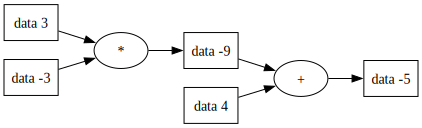

In [13]:
draw(d)